We touched on this a bit in our discussion of [Regularization in Neural Networks](https://napsterinblue.github.io/notes/machine_learning/neural_nets/regularization/), but I feel that it bears elaboration for the regression case.

In general, both of the following techniques we'll look at aim to dampen the effect of a small subset of regression coefficients from dominating our prediction schemes. Additionally, both will use our formula for the Residual Sum of Squares as a jumping off point

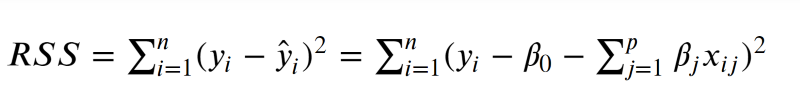

In [1]:
from IPython.display import Image

Image('images/rss_formula_long.PNG')

Then apply some tuning parameter `lambda` to rein in our coefficients. At this point, finding the correct value for `lambda` becomes the name of the game.

**Note**: In the examples below, they're working with a dataset where only like 3 of the features are actually of any use to the model. Thus, we apply different Regression Regularization techniques to try and coerce more information out of them.

### Ridge (L2) Regression

Ridge Regression applies a squared penalty term, `lambda` at the end of our RSS, like so

$ RSS + \lambda \sum_{j=1}^p \beta_j^2$

Intuitively, this has the effect of shrinking the values of `B_i`, each coefficient, as `lambda` increases. Indeed as `lambda` approaches infinity, all of them tend to zero, as evidenced by the left-hand figure below.

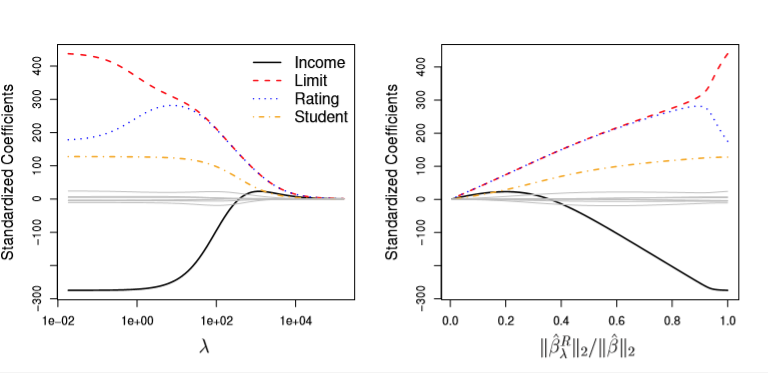

In [2]:
from IPython.display import Image

Image('images/fig_6_4.PNG')

The right takes a bit of head-scratching to read quickly.

For starters the double-bar, "L2 norm" notation means

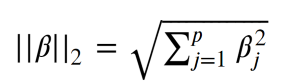

In [3]:
Image('images/l2_norm_formula.PNG')

Or the distance from `0` to `Beta`.

And so the denominator of the X-axis on the right is the distance of our `Beta` coefficients, *absent any penality* `lambda`. This is held constant.

The X-axis can take on values between `0` and `1`, but intuitively, this means:

- `1`: The top is equal to the bottom, which only occurs when `lambda = 0`, and no regularization occurs. Note that this means the coefficients in red, yellow, and blue are all fairly large.
- `0`: This means that the top of the fraction is basically 0. And as mentioned above, this occurs when the `lambda` penalty has basically beaten all of the coefficients into the ground.

Thus, we can read the ratio on the x-axis as simply "the amount that the coefficients have been shrunken to zero."

### Lasso (L1) Regression

Lasso Regression, on the other hand, fits the same form as Ridge Regression except the last term is penalized by the absolute value, not the square, of our coefficients.

Thus

$RSS + \lambda\sum_{j=1}^p|\beta_j|$

But whereas increasing values of `lambda` may drive Ridge coefficients *towards* zero, sufficently-large values will cause Lasso coefficients to be *exactly* zero. Therefore, it's not inaccurate to say that Lasso performs a sort of variable selection, as these zero-coefficients drop out as below.

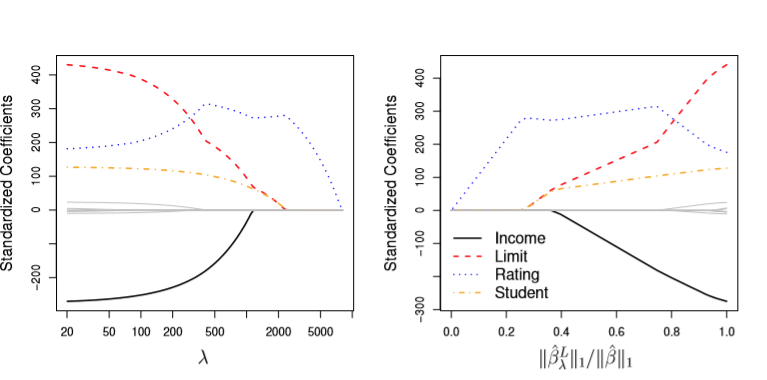

In [4]:
Image('images/fig_6_6.PNG')

In the event that we see variable coeffients becoming zero, this means that we've got less to interpret, and therefore Lasso Regression has the advantage of easier interpretability.

### Bad Names are Bad

The following two images show contour plots with constant levels of RSS.

If you constrain both Ridge and Lasso Regressions such that their coefficients are bound by

$\sum_{j=1}^p|\beta_j| \leq s$

$\sum_{j=1}^p\beta^2_j \leq s$

respectively, then the blue areas represent the constant solution space for Lasso (left) and Ridge (right) for a given `s`, optimized at the point tangent to the outer-most contour

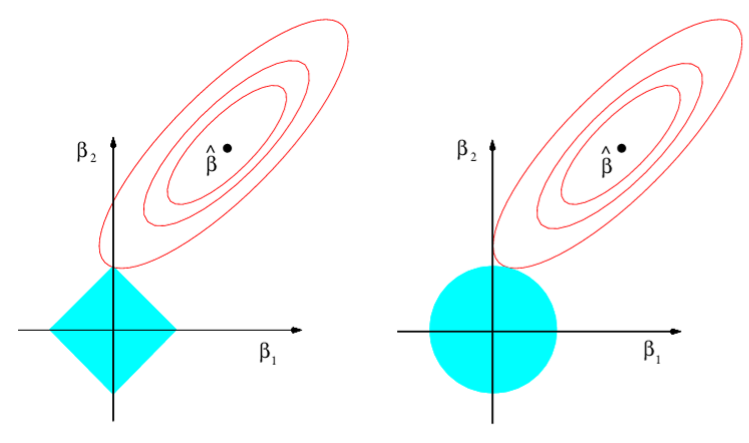

In [5]:
Image('images/fig_6_7.PNG')

If you're like me, the notion that the *round area* wasn't Lasso and that the *rigid* area wasn't Ridge is impossibly confusing.

However, Ridge Regression makes... marginally more sense, when you instead consider that it was *designed to address ridge-shapes in your dataset*, like the following.

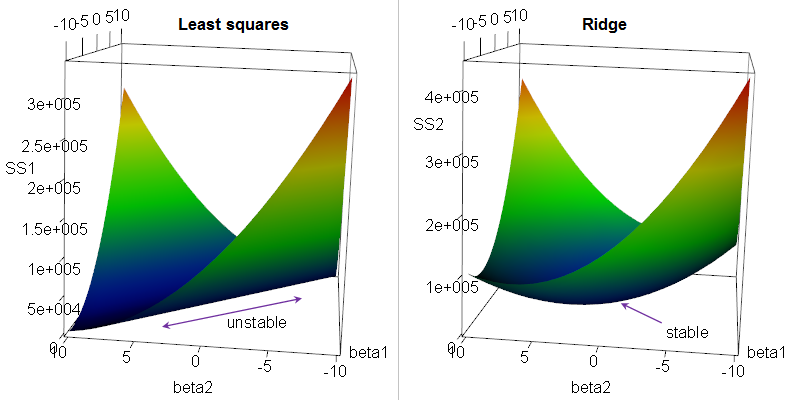

In [6]:
Image('images/ridge_name.png')

Lasso, on the other hand, stands for [Least Absolute Shrinkage and Selection Operator](https://en.wikipedia.org/wiki/Lasso_(statistics)), which technically makes sense, but the acronym feels like such a stretch that I will die on the hill of "They just named it that way because it'd be funny to confuse people." Meh.

### When to Use Ridge vs Lasso

Pulling directly from the perfectly-cogent explanation in ISL:

> In general, one might expect the lasso to perform better in a setting where a relatively small number of predictors have substantial coefficients, and the remaining predictors have coefficients that are very small or that equal zero. Ridge regression will perform better when the response is a function of many predictors, all with coefficients of roughly equal size.

Regardless of which technique you employ, however, it's worth noting that you want to standardize your data before attempting either. Due to its squared nature, Ridge Regression is particularly sensitive to coefficients of different scales.

## Bias-Variance Tradeoff

As ISL defines near the beginning of the book, our equation for the Expected Test MSE is as follows

$E(y_0 - \hat{f}(x_0))^2 = Var(\hat{f}(x_0)) + [Bias(f(x_0))]^2 + Var(\epsilon)$

Fundamentally, this means that our error will be *some* combination of the Variance and Bias of our predictions (represented as Green and Black lines below) and an inescable error term (omitted)

Plotting these values for Ridge Regression, we can see that `lambda` has a huge effect on how biased our models are.

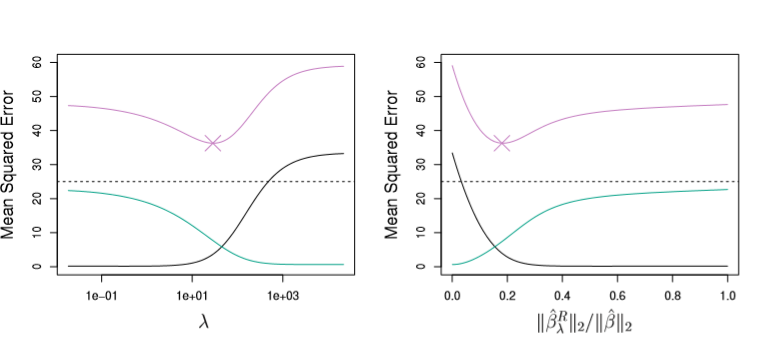

In [7]:
Image('images/figure_6_5.PNG')

Making similar plots for the Lasso case, we re-affirm an observation made in [our notebook on the R-Squared statistic](https://napsterinblue.github.io/notes/machine_learning/regression/r_squared/), that it's not necessarily optimal to select the model with the highest R-Squared.

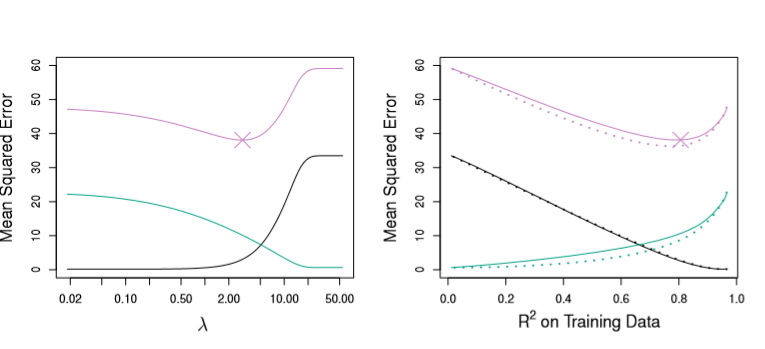

In [8]:
Image('images/fig_6_8.PNG')